<a href="https://colab.research.google.com/github/RAHUL-REDDY-A/ML/blob/main/ML_LAB_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1. Write a function to calculate the entropy associated with your dataset. (If your dataset contains only continuous numeric data for outcome (a regression problem), employ equal width binning and divide your data into 4 bins. Each bin may be considered as a categorical data value. Write a function for equal width binning).

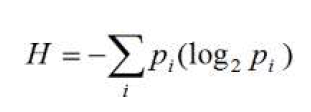
\
Here, pi refers to the probability of occurrence of each outcome value.

In [11]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/MHDS.csv")
print("Dataset Shape:", df.shape)
print(df.head())

# Identify target column
target_col = df.columns[-1]

# Equal Width Binning
def equal_width_binning(series, bins=4):
    return pd.cut(series, bins=bins, labels=False)

# Entropy Calculation
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# Apply binning if target is numeric
if np.issubdtype(df[target_col].dtype, np.number):
    df[target_col] = equal_width_binning(df[target_col], bins=4)

print("Entropy of target:", entropy(df[target_col]))


Dataset Shape: (50000, 17)
   User_ID  Age             Gender   Occupation    Country  \
0        1   36               Male    Education  Australia   
1        2   48               Male  Engineering      Other   
2        3   18  Prefer not to say        Sales      India   
3        4   30         Non-binary  Engineering  Australia   
4        5   58               Male           IT        USA   

  Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                     Yes      NaN                  Yes          Low   
1                      No      Low                   No          Low   
2                      No      NaN                  Yes       Medium   
3                      No   Medium                   No          Low   
4                     Yes      NaN                  Yes         High   

   Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0          7.6          46                        8                 2.2   
1          6.8   

A2. Calculate the Gini index value for your dataset.

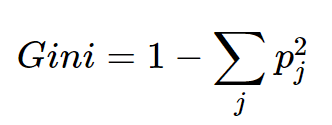

In [12]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/MHDS.csv")
print("Dataset Shape:", df.shape)
print(df.head())

# Identify target column
target_col = df.columns[-1]

# Gini Index Calculation
def gini_index(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

print("Gini Index of target:", gini_index(df[target_col]))

Dataset Shape: (50000, 17)
   User_ID  Age             Gender   Occupation    Country  \
0        1   36               Male    Education  Australia   
1        2   48               Male  Engineering      Other   
2        3   18  Prefer not to say        Sales      India   
3        4   30         Non-binary  Engineering  Australia   
4        5   58               Male           IT        USA   

  Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                     Yes      NaN                  Yes          Low   
1                      No      Low                   No          Low   
2                      No      NaN                  Yes       Medium   
3                      No   Medium                   No          Low   
4                     Yes      NaN                  Yes         High   

   Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0          7.6          46                        8                 2.2   
1          6.8   

A3. Write your own module for detecting the feature / attribute for the root note of a Decision Tree. Use Information gain as the impurity measure for identifying the root node. Assume that the features are categorical or could be converted to categorical by binning.

In [13]:
import pandas as pd
from math import log2

# Load dataset
df = pd.read_csv("/content/MHDS.csv").head(1000)

# Entropy function
def calculate_entropy(series):
    probs = series.value_counts(normalize=True)
    return -sum(p * log2(p) for p in probs if p > 0)

# Information gain
def information_gain(df, feature, target="Mental_Health_Condition"):
    total_entropy = calculate_entropy(df[target])
    values = df[feature].dropna().unique()
    weighted_entropy = 0
    for val in values:
        subset = df[df[feature] == val]
        weighted_entropy += (len(subset)/len(df)) * calculate_entropy(subset[target])
    return total_entropy - weighted_entropy

# Detect best root node
features = ["Age", "Gender", "Occupation", "Country", "Stress_Level"]
info_gains = {feat: information_gain(df, feat) for feat in features if feat in df.columns}
root = max(info_gains, key=info_gains.get)
print("Root Node:", root)
print("Information Gains:", info_gains)


Root Node: Age
Information Gains: {'Age': 0.01714148187804554, 'Gender': 0.0011375117779656163, 'Occupation': 0.0012908498404554658, 'Country': 0.009131655180977583, 'Stress_Level': 0.0021061793777272797}


A4. If the feature is continuous valued for A3, use equal width or frequency binning for converting the attribute to categorical valued. The binning type should be a parameter to the function built for binning. Write your own function for the binning task. The number of bins to be created should also be passed as a parameter to the function. Use function overloading to allow for usage of default parameters if no parameters are passed

In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/MHDS.csv").head(1000)

# Flexible binning
def flexible_binning(series, bins=4, method="equal_width"):
    if method == "equal_width":
        return pd.cut(series, bins=bins, labels=[f"Bin{i}" for i in range(1, bins+1)])
    elif method == "frequency":
        return pd.qcut(series, q=bins, labels=[f"Bin{i}" for i in range(1, bins+1)])
    else:
        raise ValueError("Method must be 'equal_width' or 'frequency'.")

# Example: Binning Sleep_Hours
df["Sleep_Hours_binned"] = flexible_binning(df["Sleep_Hours"], bins=3, method="frequency")
print(df[["Sleep_Hours", "Sleep_Hours_binned"]].head())


   Sleep_Hours Sleep_Hours_binned
0          7.6               Bin2
1          6.8               Bin2
2          7.1               Bin2
3          6.9               Bin2
4          4.7               Bin1


A5. Expand the above functions to built your own Decision Tree module.


In [21]:
import pandas as pd
from math import log2

# Load dataset
df = pd.read_csv("/content/MHDS.csv").head(1000)

# Entropy
def calculate_entropy(series):
    probs = series.value_counts(normalize=True)
    return -sum(p * log2(p) for p in probs if p > 0)

# Information gain
def information_gain(df, feature, target="Mental_Health_Condition"):
    total_entropy = calculate_entropy(df[target])
    values = df[feature].dropna().unique()
    weighted_entropy = 0
    for val in values:
        subset = df[df[feature] == val]
        weighted_entropy += (len(subset)/len(df)) * calculate_entropy(subset[target])
    return total_entropy - weighted_entropy

# Custom decision tree
class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = None

    def build_tree(self, df, depth=0):
        target = "Mental_Health_Condition"
        if len(df[target].unique()) == 1 or depth >= self.max_depth:
            return df[target].mode()[0]
        features = [col for col in df.columns if col not in [target, "User_ID"]]
        gains = {feat: information_gain(df, feat) for feat in features}
        best_feature = max(gains, key=gains.get)
        tree = {best_feature: {}}
        for val in df[best_feature].dropna().unique():
            subtree = self.build_tree(df[df[best_feature] == val], depth+1)
            tree[best_feature][val] = subtree
        return tree

    def fit(self, df):
        self.tree = self.build_tree(df)

    def get_tree(self):
        return self.tree

# Train and print custom tree
dtree = DecisionTree(max_depth=3)
dtree.fit(df)
print("Custom Decision Tree:", dtree.get_tree())


Custom Decision Tree: {'Severity': {'Low': {'Sleep_Hours': {np.float64(6.8): 'No', np.float64(4.8): {'Age': {np.int64(53): 'No', np.int64(51): 'No', np.int64(62): 'Yes'}}, np.float64(4.0): 'No', np.float64(5.0): {'Age': {np.int64(49): 'No', np.int64(43): 'No', np.int64(29): 'No', np.int64(59): 'Yes'}}, np.float64(7.4): {'Age': {np.int64(27): 'No', np.int64(52): 'No', np.int64(60): 'No', np.int64(44): 'Yes', np.int64(18): 'No', np.int64(56): 'Yes', np.int64(22): 'Yes', np.int64(54): 'No'}}, np.float64(9.7): {'Age': {np.int64(30): 'No', np.int64(64): 'Yes', np.int64(57): 'Yes'}}, np.float64(8.6): 'Yes', np.float64(4.6): {'Age': {np.int64(47): 'Yes', np.int64(38): 'No', np.int64(20): 'No'}}, np.float64(7.0): 'Yes', np.float64(8.1): 'Yes', np.float64(6.0): {'Age': {np.int64(42): 'No', np.int64(34): 'Yes'}}, np.float64(4.9): {'Age': {np.int64(43): 'No', np.int64(60): 'Yes', np.int64(59): 'Yes', np.int64(52): 'Yes'}}, np.float64(5.2): {'Age': {np.int64(37): 'Yes', np.int64(29): 'No', np.int6

A6. Draw and visualize the decision tree constructed based on your data. (Refer above provided web sources [1] & [2] for understanding and learning on how to visualize a DT).


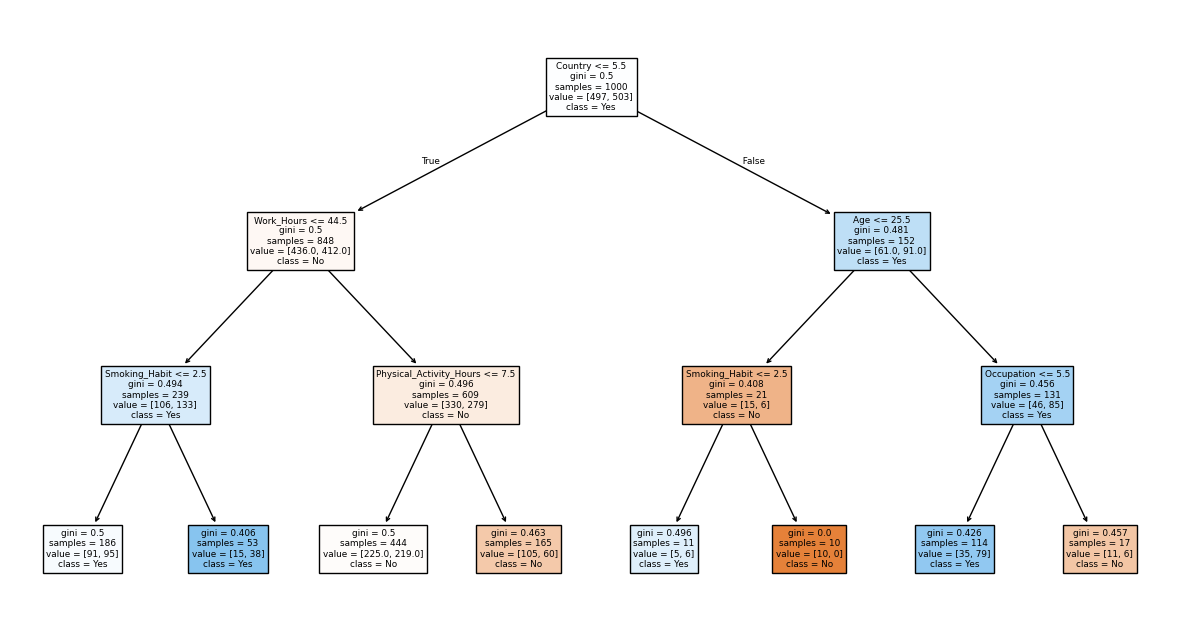

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/MHDS.csv").head(1000)

# Encode categorical variables
df_encoded = df.copy()
encoders = {}
for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        encoders[col] = le

# Train decision tree
X = df_encoded.drop(["Mental_Health_Condition", "User_ID"], axis=1)
y = df_encoded["Mental_Health_Condition"]

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Plot decision tree
plt.figure(figsize=(15,8))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()


A7. Use 2 features from your dataset for a classification problem. Visualize the decision boundary created by your DT in the vector space. (Refer above provided web source [3] & [2] for understanding and learning on how to draw decision boundary for a DT).

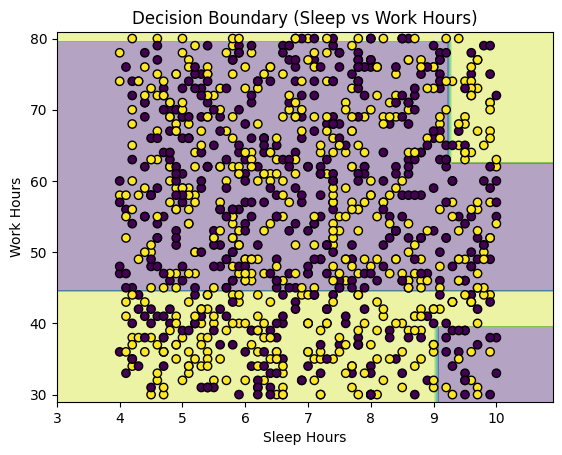

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("/content/MHDS.csv").head(1000)

# Select features
X = df[["Sleep_Hours", "Work_Hours"]].values
y = (df["Mental_Health_Condition"] == "Yes").astype(int)

# Train decision tree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k")
plt.xlabel("Sleep Hours")
plt.ylabel("Work Hours")
plt.title("Decision Boundary (Sleep vs Work Hours)")
plt.show()
